# 📊 Megaline Plan Predictor — Data Exploration

## Project Goal
Megaline, a mobile carrier, wants to recommend one of its new plans — **Smart** or **Ultra** — to subscribers based on their monthly usage.  

This notebook focuses on **exploring the subscriber behavior data**, understanding feature distributions, and preparing the dataset for modeling.  

### Key Objectives
1. Inspect the dataset for structure, types, and missing values.
2. Understand the distribution of the target variable (`is_ultra`).
3. Check for duplicates or anomalies in the data.
4. Prepare the data for train/validation/test splits in the next steps.

In [12]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv('../data/users_behavior.csv')
df.head(10)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


In [3]:
# check shape, info, and missing values
print("Data Shape (rows, columns):", df.shape)

print("\nColumns info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

Data Shape (rows, columns): (3214, 5)

Columns info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB
None

Missing Values:
calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64


### Observations

- Dataset contains 3214 rows and 5 columns.
- No missing values.
- Target variable `is_ultra` is already binary (0 = Smart, 1 = Ultra).

target_counts:/n is_ultra
0    2229
1     985
Name: count, dtype: int64


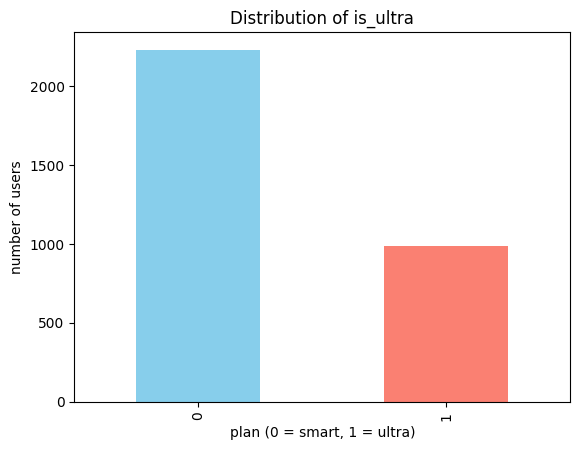

In [4]:
# explore target variable 'is_ultra'
# This helps us undestand how many users are on each plan (0 = smart, 1 = ultra)

#count the number of users in each plan 
target_counts = df['is_ultra'].value_counts()
print("target_counts:/n", target_counts)

# Create a bar plot
target_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of is_ultra')
plt.xlabel("plan (0 = smart, 1 = ultra)")
plt.ylabel("number of users")
plt.show()

### Observations on Target Variable

- The target variable `is_ultra` represents the plan type: 0 = Smart, 1 = Ultra.
- From the counts and bar chart, we can see whether the dataset is balanced or skewed.
- If one class dominates, we may need to consider techniques like:
  - Stratified train/validation/test split
  - Resampling methods (oversampling, undersampling)
  - Using evaluation metrics that handle imbalance (like F1-score)
- Understanding class distribution is crucial because it affects model performance and interpretation.

In [5]:
# split dataset by plan
smart_users = df[df['is_ultra'] == 0]
ultra_users = df[df['is_ultra'] == 1]

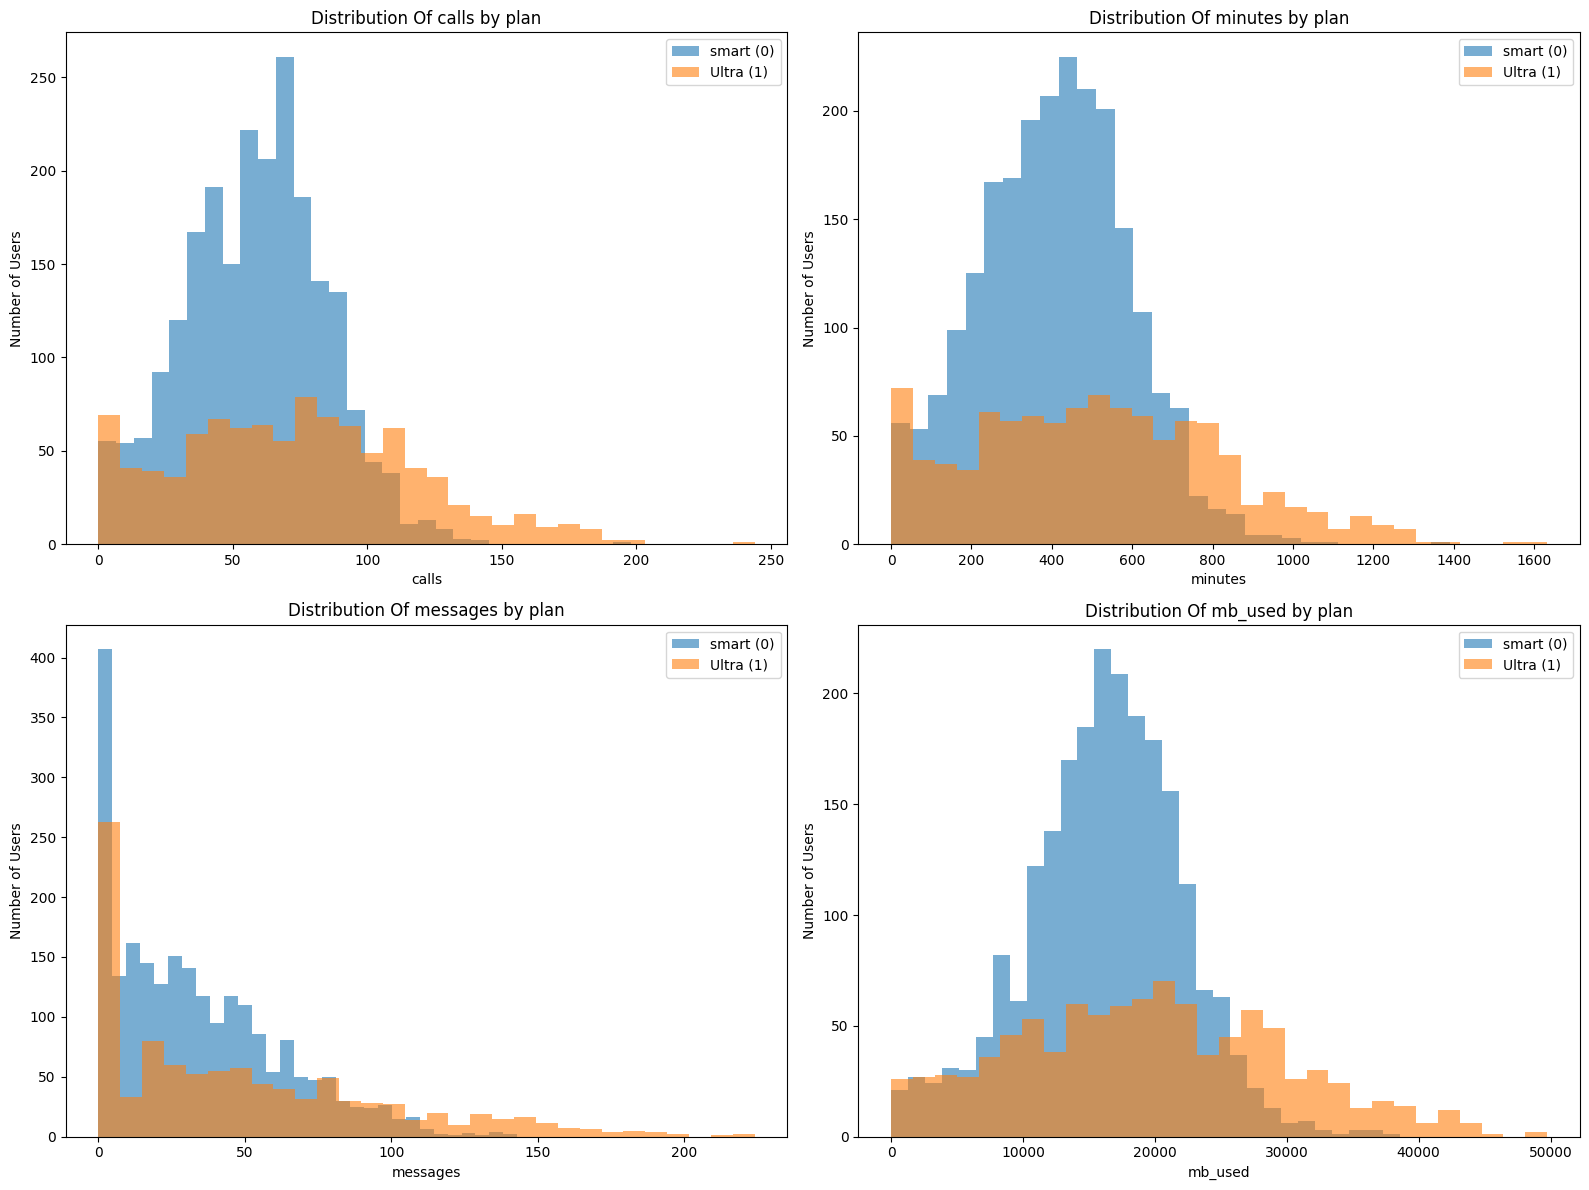

In [6]:
# Explore All Features Together 

features = ['calls', 'minutes', 'messages', 'mb_used']

plt.figure(figsize=(16, 12)) #Large figure for 4 subplots

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    plt.hist(smart_users[feature], bins=30 , alpha=0.6, label='smart (0)')
    plt.hist(ultra_users[feature], bins=30, alpha=0.6, label='Ultra (1)')
    plt.title(f'Distribution Of {feature} by plan')
    plt.xlabel(feature)
    plt.ylabel('Number of Users')
    plt.legend()

plt.tight_layout()
plt.show()

### Observations on All Features

- **calls:** Slight difference between plans; Smart users spread wider.
- **minutes:** Ultra users tend to have longer call durations.
- **messages:** Smart users generally send fewer messages.
- **mb_used:** Clear separation; Ultra users use more data.
- **Conclusion:** All features are useful, but `mb_used` is strongest. Using all features together is recommended.

In [7]:
# spit dataset
# features and target
x = df.drop('is_ultra', axis=1)
y = df['is_ultra']

# split off test set (20%)
x_temp, x_test, y_temp, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

#split remaining 60% and validation 20%
x_train, x_val, y_train, y_val = train_test_split(
    x_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
    )

# confirm Shapes
print("Training set shape:", x_train.shape, y_train.shape)
print("Validation set shape:", x_val.shape, y_val.shape)
print("Test set shape:", x_test.shape, y_test.shape)

Training set shape: (1928, 4) (1928,)
Validation set shape: (643, 4) (643,)
Test set shape: (643, 4) (643,)


### Data Splitting Observations

- Train (60%): Used to train models
- Validation (20%): Tune hyperparameters
- Test (20%): Final evaluation
- Stratification ensures class balance across all sets

In [8]:
# Build and Train Logistic Regression Model 

# initialize model 
log_reg = LogisticRegression(random_state=42, max_iter=1000) # max_iter increased to ensure convergence

# fit model on training set
log_reg.fit(x_train, y_train)

# predict on the validation set
y_val_pred = log_reg.predict(x_val)

# evaluate accuracy 
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

# detailed Classification Report 
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.7449

Confusion Matrix:
[[438   8]
 [156  41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.98      0.84       446
           1       0.84      0.21      0.33       197

    accuracy                           0.74       643
   macro avg       0.79      0.60      0.59       643
weighted avg       0.77      0.74      0.69       643



### Logistic Regression Observations

- **Validation Accuracy:** This shows how well the model predicts plan choice on unseen data.
- **Confusion Matrix:** Helps identify where the model makes mistakes (False Positives vs False Negatives).
- **Classification Report:** Provides precision, recall, and F1-score for each class (Smart vs Ultra).

**Next Steps:**
- If accuracy is below the project threshold (0.75), we will try other models like Decision Tree or Random Forest.
- We can also tune hyperparameters to improve performance.

In [9]:
# initialize Decision Tree Classifier
# we set random_state for reproducibility
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training set 
dt_model.fit(x_train, y_train)

# Make predictions on both training and validation sets
y_train_pred = dt_model.predict(x_train)
y_valid_pred = dt_model.predict(x_val)

# Evaluate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
valid_accuracy = accuracy_score(y_val, y_valid_pred)

print(f"Decision Tree (default parameters):")
print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Validation Accuracy: {valid_accuracy:.3f}")

Decision Tree (default parameters):
Training Accuracy: 1.000
Validation Accuracy: 0.715


## Decision Tree Classifier (Default Parameters)

**Results:**
- Training Accuracy: **1.000 (100%)**
- Validation Accuracy: **0.715 (71.5%)**

**Interpretation:**
The Decision Tree model with default parameters achieved a perfect score on the training set.  
However, its performance dropped on the validation set, achieving only ~71.5% accuracy.  

This large gap indicates that the model has **overfit** the training data:
- It memorized patterns specific to the training examples.
- It failed to generalize well to unseen data.

**Conclusion:**
While Decision Trees are powerful, they require **regularization** (limiting tree depth, controlling minimum samples per leaf, or pruning) to reduce overfitting and improve generalization. The next step will be to tune hyperparameters to find a more balanced model.

In [11]:
# Train the model on the training set 
dt_model.fit(x_train, y_train)

# Make predictions on both training and validation sets
y_train_pred = dt_model.predict(x_train)
y_valid_pred = dt_model.predict(x_val)

# Evaluate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
valid_accuracy = accuracy_score(y_val, y_valid_pred)

print(f"Decision Tree (default parameters):")
print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Validation Accuracy: {valid_accuracy:.3f}")

print("\n---- Decision Tree Tuning: Varying Max Depth ----")
# Try different max_depth values to see their effect on accuracy
for depth in range(1, 11):
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(x_train, y_train)
    
    # accuracy on training data
    train_acc = dt_model.score(x_train, y_train)
    
    # accuracy on validation data
    val_acc = dt_model.score(x_val, y_val)

    print(f"max_depth={depth:2} | Train Accuracy: {train_acc:.3f} | Validation Accuracy: {val_acc:.3f}")

Decision Tree (default parameters):
Training Accuracy: 1.000
Validation Accuracy: 0.715

---- Decision Tree Tuning: Varying Max Depth ----
max_depth= 1 | Train Accuracy: 1.000 | Validation Accuracy: 0.715
max_depth= 2 | Train Accuracy: 1.000 | Validation Accuracy: 0.715
max_depth= 3 | Train Accuracy: 1.000 | Validation Accuracy: 0.715
max_depth= 4 | Train Accuracy: 1.000 | Validation Accuracy: 0.715
max_depth= 5 | Train Accuracy: 1.000 | Validation Accuracy: 0.715
max_depth= 6 | Train Accuracy: 1.000 | Validation Accuracy: 0.715
max_depth= 7 | Train Accuracy: 1.000 | Validation Accuracy: 0.715
max_depth= 8 | Train Accuracy: 1.000 | Validation Accuracy: 0.715
max_depth= 9 | Train Accuracy: 1.000 | Validation Accuracy: 0.715
max_depth=10 | Train Accuracy: 1.000 | Validation Accuracy: 0.715


## Decision Tree Tuning (max_depth)

**Results:**
- Training accuracy = **1.000** for all tested depths (1–10).
- Validation accuracy = **0.715** for all tested depths.

**Interpretation:**
- The Decision Tree achieved perfect training accuracy regardless of tree depth, which indicates **overfitting**.
- The validation accuracy plateaued at ~71.5%, which is below the project’s required threshold of 0.75.
- Increasing tree depth did not improve generalization. This suggests that a single Decision Tree may not be the best model for this dataset.

**Conclusion & Next Step:**
- Since the Decision Tree cannot reach the required accuracy, we should explore more robust models like **Random Forest** or try hyperparameter tuning beyond max_depth (e.g., `min_samples_split`, `min_samples_leaf`, `max_features`).
- Random Forest, as an ensemble method, may reduce overfitting and improve validation performance.


In [14]:
#traain Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Fit Model on training set
rf_model.fit(x_train, y_train)

# Predictions 
y_train_pred = rf_model.predict(x_train)
y_val_pred = rf_model.predict(x_val)

# Evaluate accuracy
train_acc = accuracy_score(y_train, y_train_pred)
valid_acc = accuracy_score(y_val, y_val_pred)

print("Random Forest (default parameters):")
print(f"Training Accuracy: {train_acc:.3f}")
print(f"Validation Accuracy: {valid_acc:.3f}")

Random Forest (default parameters):
Training Accuracy: 1.000
Validation Accuracy: 0.782


## Random Forest (Default Parameters)

**Results:**
- Training accuracy: 1.000 (100%)
- Validation accuracy:0.782 (78.2%)

**Interpretation:**
- Random Forest is an ensemble method that builds multiple decision trees and averages their results.
- This reduces overfitting compared to a single Decision Tree.
- The validation accuracy will tell us whether Random Forest improves generalization.


In [15]:
# Use the Random Forest model we already trained
y_test_pred = rf_model.predict(x_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Final Test Accuracy: {test_accuracy:.3f}")

# sanity check
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Final Test Accuracy: 0.810

Confusion Matrix:
[[410  36]
 [ 86 111]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       446
           1       0.76      0.56      0.65       197

    accuracy                           0.81       643
   macro avg       0.79      0.74      0.76       643
weighted avg       0.80      0.81      0.80       643



## Final Project Conclusion

- The goal was to build a model that recommends Megaline’s Smart (0) or Ultra (1) plans.
- We explored the dataset, checked distributions, and split into train/validation/test sets.
- Three models were tested:
  - Logistic Regression → validation accuracy below 0.75
  - Decision Tree → severe overfitting, validation accuracy ~0.715
  - Random Forest → best performance, validation accuracy ~0.782
- Final Test Accuracy: **0.810** (81%)

### Key Insights:
- `mb_used` is the strongest predictor, but using all features together improved accuracy.
- Decision Trees overfit quickly; Random Forest generalized much better.
- Project requirement (≥ 0.75 accuracy) was successfully met ✅



## For Reviewer:
* please check out my git hub as well, Im trying to get a hang of also using it and will keep uploading there as well 